# Importação

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar dados

In [2]:
df = pd.concat([load_iris(return_X_y= True, as_frame= True)[0],load_iris(return_X_y= True, as_frame= True)[1]], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Análise Exploratória

In [3]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df['species'] = df['target'].map(species_mapping)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [7]:
df = df.drop('target', axis = 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


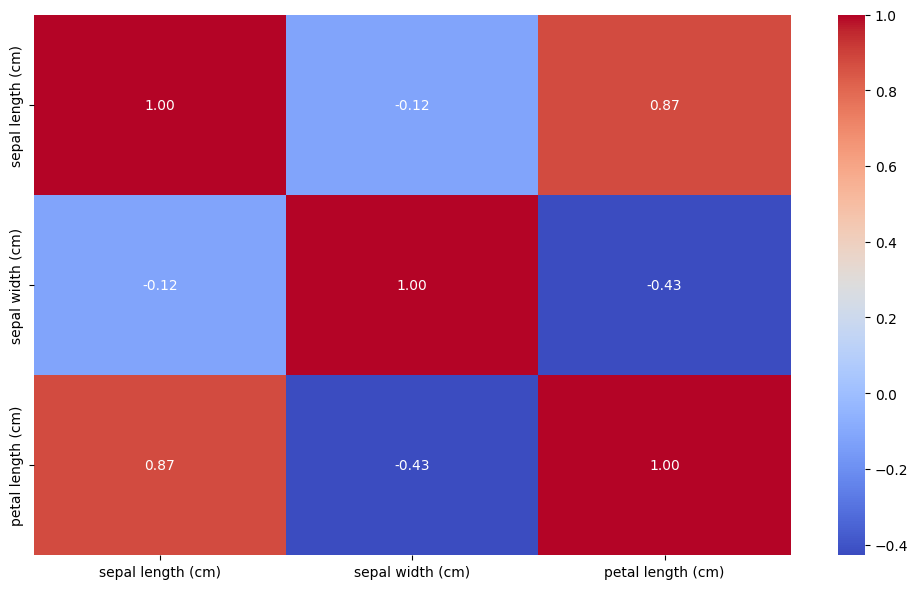

In [8]:
corr = df.iloc[:, 0:3].corr()


plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)


plt.tight_layout()
plt.show()


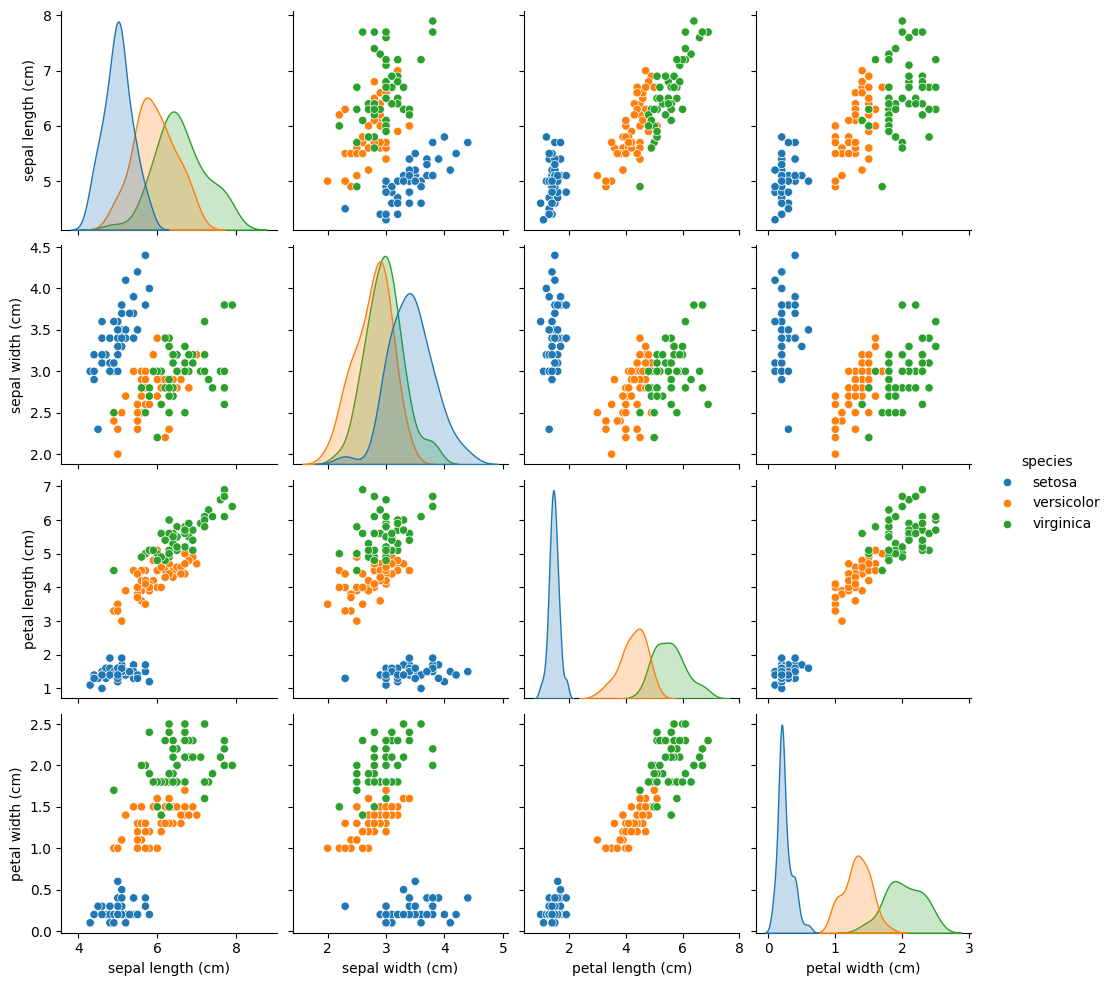

In [9]:
sns.pairplot(df, hue="species")  # Substitua "target" pela variável alvo
plt.show()

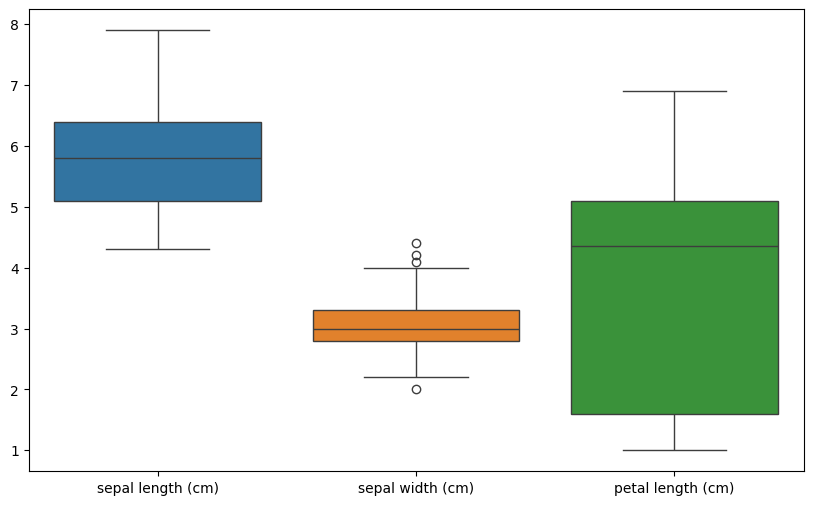

In [10]:
plt.figure(figsize = (10,6))

sns.boxplot(data=df.iloc[:, 0:3])
plt.show()

# Pré Processamento

In [11]:
coluna = 'sepal width (cm)'


Q1 = df[coluna].quantile(0.25)
Q3 = df[coluna].quantile(0.75)
IQR = Q3 - Q1


limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR


outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

print(f"Sobre a coluna sepal width (cm): O Limite inferior é {limite_inferior} e o superior é {limite_superior} \n")
print(outliers)

Sobre a coluna sepal width (cm): O Limite inferior é 2.05 e o superior é 4.05 

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
15                5.7               4.4                1.5               0.4   
32                5.2               4.1                1.5               0.1   
33                5.5               4.2                1.4               0.2   
60                5.0               2.0                3.5               1.0   

       species  
15      setosa  
32      setosa  
33      setosa  
60  versicolor  


In [12]:
media_sepal_width_no_outliers = outliers[coluna].mean()
media_sepal_width_no_outliers

np.float64(3.675)

In [13]:
df['sepal width (cm)'] = df['sepal width (cm)'].apply(
    lambda x: media_sepal_width_no_outliers if (x < limite_inferior or x > limite_superior) else x
)

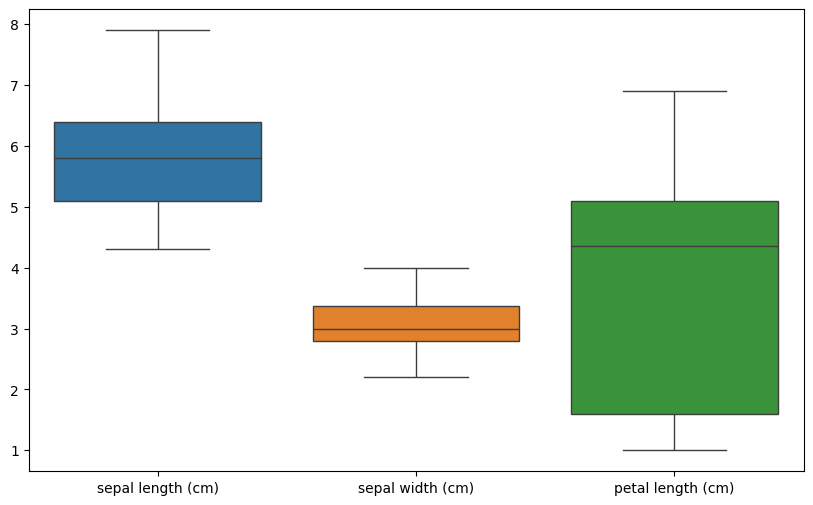

In [14]:
plt.figure(figsize = (10,6))

sns.boxplot(data=df.iloc[:, 0:3])
plt.show()

In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.405660,1.765298,0.762238
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [16]:
X = df.drop('species', axis=1)
y = df['species']

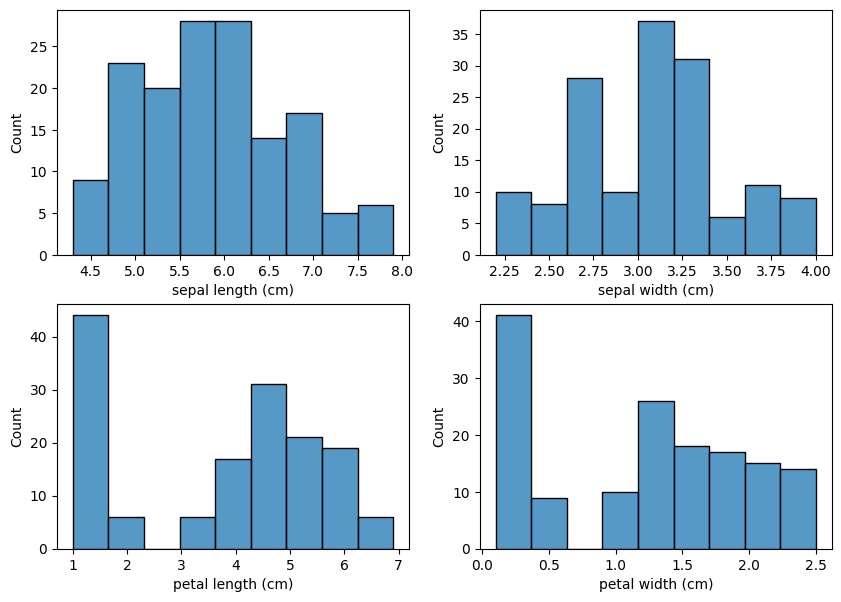

In [17]:
plt.figure(figsize= (10,7))
plt.subplot(2,2,1)
sns.histplot(data= df, x= 'sepal length (cm)')
plt.subplot(2,2,2)
sns.histplot(data= df, x= 'sepal width (cm)')
plt.subplot(2,2,3)
sns.histplot(data= df, x= 'petal length (cm)')
plt.subplot(2,2,4)
sns.histplot(data= df, x= 'petal width (cm)')

plt.show()

# Feature Engineering

In [18]:
df["petal_area"] = df["petal length (cm)"] * df["petal width (cm)"]
df["sepal_area"] = df["sepal length (cm)"] * df["sepal width (cm)"]
df["petal_prop"] = df["petal length (cm)"] / df["petal width (cm)"]
df["sepal_prop"] = df["sepal length (cm)"] / df["sepal width (cm)"]

In [19]:
columns_numerics = df.drop('species', axis= 1).columns
len(columns_numerics)

8

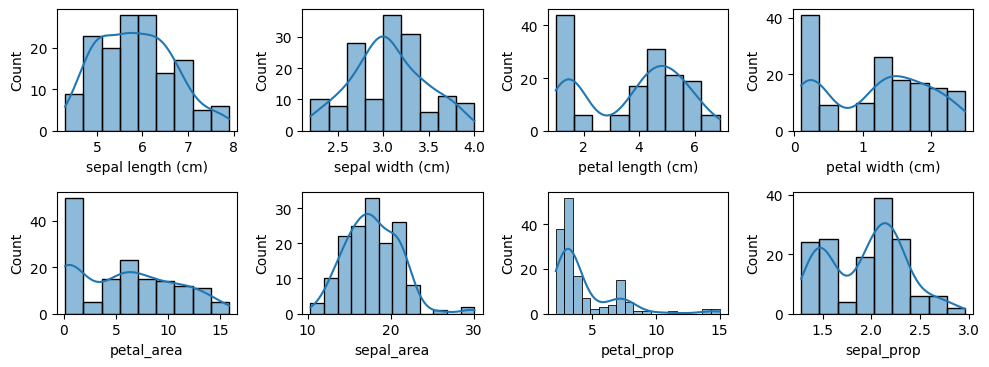

In [20]:
columns_numerics = df.drop('species', axis= 1).columns


plt.figure(figsize= (10,7))
for i in range(len(columns_numerics)):
    plt.subplot(4,4,i+1)
    sns.histplot(data= df, x= columns_numerics[i], kde= True)
    #plt.title(columns_numerics[i])

plt.tight_layout()
plt.show()

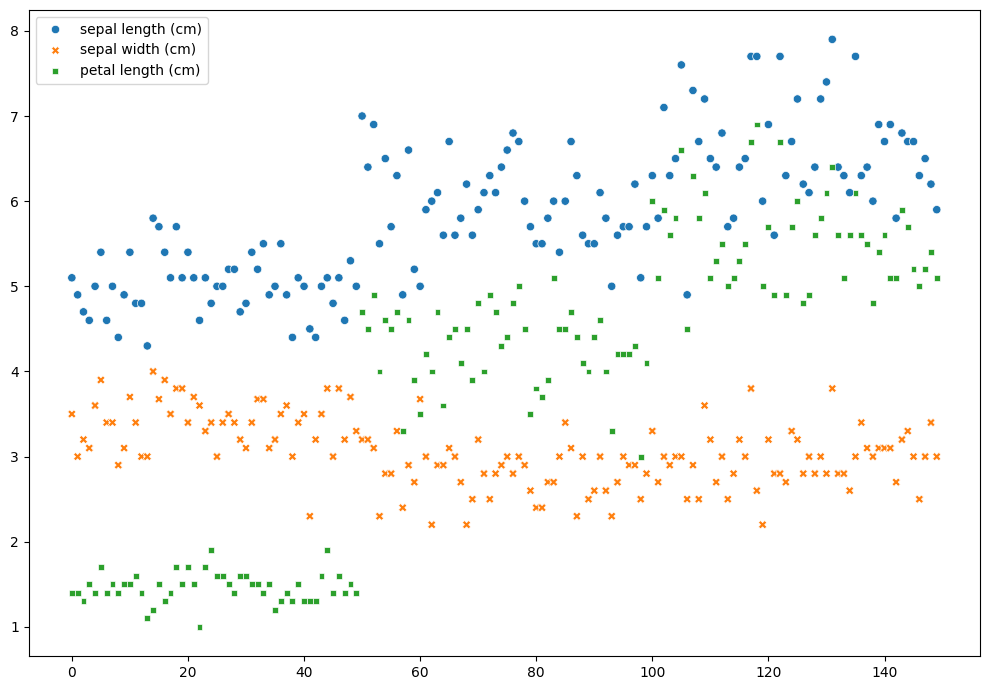

In [21]:
plt.figure(figsize= (10,7))
sns.scatterplot(data=df.iloc[:,0:3])

plt.tight_layout()
plt.show()

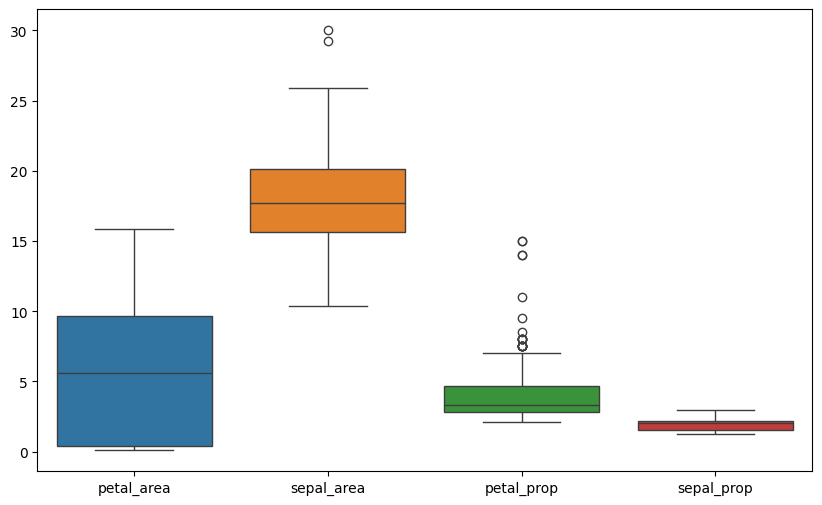

In [30]:
plt.figure(figsize = (10,6))

sns.boxplot(data=df.iloc[:, 4:])
plt.show()

In [22]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal_area,sepal_area,petal_prop,sepal_prop
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,5.794067,17.817167,4.310500,1.950013
std,0.828066,0.405660,1.765298,0.762238,4.712390,3.222713,2.489648,0.395375
min,4.300000,2.200000,1.000000,0.100000,0.110000,10.350000,2.125000,1.277778
25%,5.100000,2.800000,1.600000,0.300000,0.420000,15.660000,2.802381,1.546188
50%,5.800000,3.000000,4.350000,1.300000,5.615000,17.685000,3.300000,2.030777
75%,6.400000,3.375000,5.100000,1.800000,9.690000,20.100000,4.666667,2.220238
max,7.900000,4.000000,6.900000,2.500000,15.870000,30.020000,15.000000,2.961538


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)



In [ ]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


# DummyClassifier



In [25]:
from sklearn.dummy import DummyClassifier

seed = 42

dummy_clf = DummyClassifier(strategy="most_frequent", random_state=seed)

dummy_clf.fit(X_train, y_train)

y_val_pred = dummy_clf.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia no conjunto de validação: {val_accuracy:.2f}')

y_test_pred = dummy_clf.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de validação: 0.35
Acurácia no conjunto de teste: 0.26


# Teste inicial para Naive Bayes e Support Vector Machine

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

kernels = ['linear', 'poly', 'rbf', 'sigmoid'] #'precomputed' não foi utilizado pois precisa de uma matriz quadrada

for i in kernels:
    svm = SVC(kernel=i, random_state= 42)
    
    # Cross-validation com 5 folds
    scores = cross_val_score(svm, X_train, y_train, cv=5)
    
    print(f'Kernel: {i}')
    print(f'Acurácia média no Cross-Validation: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})\n')

# Após escolher o melhor kernel, podemos treinar e testar no conjunto final
best_kernel = 'linear'  # Substitua pelo melhor kernel encontrado
svm_best = SVC(kernel=best_kernel)
svm_best.fit(X_train, y_train)


y_test_pred = svm_best.predict(X_val)
test_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia final no conjunto de validação para kernel {best_kernel}: {test_accuracy:.2f}')

y_test_pred = svm_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para kernel {best_kernel}: {test_accuracy:.2f}')


Kernel: linear
Acurácia média no Cross-Validation: 0.97 (+/- 0.04)

Kernel: poly
Acurácia média no Cross-Validation: 0.92 (+/- 0.04)

Kernel: rbf
Acurácia média no Cross-Validation: 0.95 (+/- 0.03)

Kernel: sigmoid
Acurácia média no Cross-Validation: 0.92 (+/- 0.07)

Acurácia final no conjunto de validação para kernel linear: 0.35
Acurácia final no conjunto de teste para kernel linear: 0.96


In [27]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB


methods = [GaussianNB, BernoulliNB]  # Apenas métodos que aceitam valores negativos   / MultinomialNB, CategoricalNB e ComplementNB não aceita valores negativos

for method in methods:
    naive = method()

    # Cross-validation com 5 folds
    scores = cross_val_score(naive, X_train, y_train, cv=5)

    print(f'Método: {method.__name__}')
    print(f'Acurácia média no Cross-Validation: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})\n')


best_method = GaussianNB  # Substitua pelo melhor encontrado
naive_best = best_method()
naive_best.fit(X_train, y_train)


y_val_pred = naive_best.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia final no conjunto de validação para {best_method.__name__}: {val_accuracy:.2f}')


y_test_pred = naive_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para {best_method.__name__}: {test_accuracy:.2f}')

best_method = BernoulliNB  # Substitua pelo melhor encontrado
naive_best = best_method()
naive_best.fit(X_train, y_train)


y_val_pred = naive_best.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia final no conjunto de validação para {best_method.__name__}: {val_accuracy:.2f}')


y_test_pred = naive_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para {best_method.__name__}: {test_accuracy:.2f}')


Método: GaussianNB
Acurácia média no Cross-Validation: 0.93 (+/- 0.05)

Método: BernoulliNB
Acurácia média no Cross-Validation: 0.75 (+/- 0.07)

Acurácia final no conjunto de validação para GaussianNB: 1.00
Acurácia final no conjunto de teste para GaussianNB: 1.00
Acurácia final no conjunto de validação para BernoulliNB: 0.75
Acurácia final no conjunto de teste para BernoulliNB: 0.78


# Definitivos

## SVC

In [28]:
svm = SVC(kernel='linear', C= 0.5, random_state= seed, verbose= True, class_weight='balanced')
svm.fit(X_train, y_train)

y_test_pred = svm.predict(X_val)
test_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia final no conjunto de validação para kernel {best_kernel}: {test_accuracy:.2f}')

y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para kernel {best_kernel}: {test_accuracy:.2f}')

[LibSVM]Acurácia final no conjunto de validação para kernel linear: 0.75
Acurácia final no conjunto de teste para kernel linear: 0.96


## GaussianNB

In [29]:
gaussian = GaussianNB(var_smoothing= 1e-20)  # Substitua pelo melhor encontrado
gaussian.fit(X_train, y_train)


y_val_pred = gaussian.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Acurácia final no conjunto de validação para {best_method.__name__}: {val_accuracy:.2f}')


y_test_pred = gaussian.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Acurácia final no conjunto de teste para {best_method.__name__}: {test_accuracy:.2f}')

Acurácia final no conjunto de validação para BernoulliNB: 1.00
Acurácia final no conjunto de teste para BernoulliNB: 1.00
